In [6]:
import numpy as np
import mesa
from model import HumanitarianLogistics, COA, AZC, Newcomer, City, NGO, IND, Hotel
import activity
from budget import Budget
from Values import Values
import matplotlib.pyplot as plt
import pandas as pd

#initial config
width = 200
height = 200
num_pols = 2
city_size = 20
number_steps = 500



In [9]:
def gen_hist(group):
    names = group[0].action_names
    hist = {name:0 for name in names}


    for c in group:
        for name in names:
            for act in c.actions:
                if act.name == name:
                    hist[name] += act.counter
    plt.bar(hist.keys(), hist.values())
    plt.title('Action Histogram')
    plt.show()

A
{<activity.Language_Class object at 0x7f0a8a423e10>, <activity.Work object at 0x7f0a8a423e48>, <activity.Doctor object at 0x7f0a8a423e80>, <activity.Socialize object at 0x7f0a8a423eb8>, <activity.Study object at 0x7f0a8a423ef0>, <activity.Crime object at 0x7f0a8a423f28>, <activity.Football object at 0x7f0a8a423f60>, <activity.Volunteer object at 0x7f0a8a423f98>}
A
{<activity.Language_Class object at 0x7f0a8a423e10>, <activity.Work object at 0x7f0a8a423e48>, <activity.Doctor object at 0x7f0a8a423e80>, <activity.Socialize object at 0x7f0a8a423eb8>, <activity.Study object at 0x7f0a8a423ef0>, <activity.Crime object at 0x7f0a8a423f28>, <activity.Football object at 0x7f0a8a423f60>, <activity.Volunteer object at 0x7f0a8a423f98>}
A
{<activity.Language_Class object at 0x7f0a8a3b6e10>, <activity.Work object at 0x7f0a8a3b6e48>, <activity.Doctor object at 0x7f0a8a3b6e80>, <activity.Socialize object at 0x7f0a8a3b6eb8>, <activity.Study object at 0x7f0a8a3b6ef0>, <activity.Crime object at 0x7f0a8a3

/home/phillip/Documents/Thesis/Code/working_model/activity.py:307: RuntimeWarning: divide by zero encountered in double_scalars
  staff_fitness = self.agent.staff / (total_occ*self.agent.staff_to_resident_ratio)
/home/phillip/anaconda3/envs/port/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/phillip/anaconda3/envs/port/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


customActivity
New Activity
customActivity
New Activity
customActivity
New Activity
customActivity
New Activity
customActivity
New Activity
customActivity
New Activity
marketingCampaign
marketingCampaign
marketingCampaign
marketingCampaign
marketingCampaign
marketingCampaign
marketingCampaign
marketingCampaign
marketingCampaign
marketingCampaign
marketingCampaign
marketingCampaign
marketingCampaign
marketingCampaign
marketingCampaign
marketingCampaign
marketingCampaign
marketingCampaign
marketingCampaign
marketingCampaign
marketingCampaign
marketingCampaign
marketingCampaign
marketingCampaign
marketingCampaign
marketingCampaign
marketingCampaign
marketingCampaign
marketingCampaign
marketingCampaign
marketingCampaign
marketingCampaign
marketingCampaign
marketingCampaign
marketingCampaign
marketingCampaign
marketingCampaign
marketingCampaign
marketingCampaign
marketingCampaign
marketingCampaign
marketingCampaign
marketingCampaign
marketingCampaign
marketingCampaign
marketingCampaign
mark

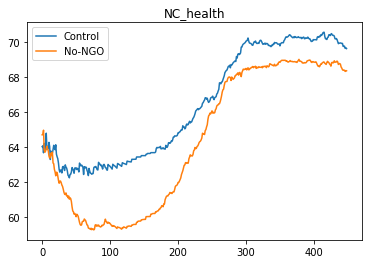

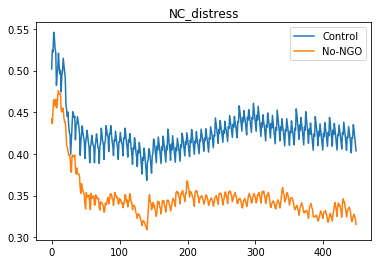

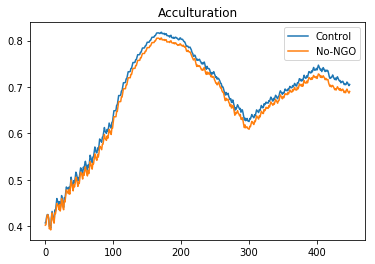

In [2]:
test = HumanitarianLogistics(width, height, num_pols, city_size, 55, 65, 45, 60)
test.include_social_networks = False
test.shock_flag = False
azcs = [azc for azc in test.schedule.agents if type(azc) is AZC]
hotels = [azc for azc in test.schedule.agents if type(azc) is Hotel]
inds = [ind for ind in test.schedule.agents if type(ind) is IND]
A = []
B = []
for azc in azcs:
    if azc.modality == 'AZC':
        if azc.unique_id % 2 == 0:
            A.append(azc)
        else:
            B.append(azc)

for a in A:
    a.city.public_opinion = 1
    a.city.ngo.funds = 1
    print('A')
    print(a.activity_center.activities_available)

for b in B:
    b.city.ngo.testing = False
    copy = set([])
    for act in b.activity_center.activities_available:
        if not (act.name == 'Football' or act.name == 'Volunteer'):
            copy.add(act)
    b.activity_center.activities_available = copy
    print('B')
    print(b.activity_center.activities_available)
    

data_a = {'NC_health' : [],
       'NC_distress': [],
       'Acculturation': []}
data_b = {'NC_health' : [],
       'NC_distress': [],
       'Acculturation': []}
for step in range(number_steps):
    test.step()
    if step > 50:
        data_a['NC_health'].append(np.mean([nc.health for azc in A for nc in azc.occupants]))
        data_a['NC_distress'].append(np.mean([nc.values.health for azc in A for nc in azc.occupants]))
        data_a['Acculturation'].append(np.mean([nc.acculturation for azc in A for nc in azc.occupants]))
        
        data_b['NC_health'].append(np.mean([nc.health for azc in B for nc in azc.occupants]))
        data_b['NC_distress'].append(np.mean([nc.values.health for azc in B for nc in azc.occupants]))
        data_b['Acculturation'].append(np.mean([nc.acculturation for azc in B for nc in azc.occupants]))

for key in data_a.keys():
    plt.plot(data_a[key])
    plt.plot(data_b[key])
    plt.legend(['Control', 'No-NGO'])
    plt.title(str(key))
    plt.show()

/home/phillip/Documents/Thesis/Code/working_model/activity.py:307: RuntimeWarning: divide by zero encountered in double_scalars
  staff_fitness = self.agent.staff / (total_occ*self.agent.staff_to_resident_ratio)
/home/phillip/anaconda3/envs/port/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/phillip/anaconda3/envs/port/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/phillip/Documents/Thesis/Code/working_model/organizations.py:303: RuntimeWarning: divide by zero encountered in double_scalars
  staff_fitness = self.staff / (total_occ*self.staff_to_resident_ratio)


marketingCampaign
marketingCampaign
Fundraise
Fundraise
Fundraise
marketingCampaign
Fundraise
marketingCampaign
Fundraise
marketingCampaign
customActivity
New Activity
customActivity
New Activity
Fundraise
customActivity
New Activity
Fundraise
Fundraise
Fundraise
customActivity
New Activity
customActivity
New Activity
Fundraise
Fundraise
Fundraise
marketingCampaign
marketingCampaign
Fundraise
marketingCampaign
marketingCampaign
Fundraise
Fundraise
marketingCampaign
Fundraise
Fundraise
marketingCampaign
marketingCampaign
Fundraise
marketingCampaign
marketingCampaign
Fundraise
marketingCampaign
Fundraise
Fundraise
marketingCampaign
Fundraise
marketingCampaign
marketingCampaign
Fundraise
Fundraise
marketingCampaign
marketingCampaign
Fundraise
marketingCampaign
Fundraise
marketingCampaign
Fundraise
marketingCampaign
Fundraise
Fundraise
Fundraise
marketingCampaign
marketingCampaign
marketingCampaign
Fundraise
Fundraise
Fundraise
marketingCampaign
Fundraise
Fundraise
marketingCampaign
market

problematic
Fundraise
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problemat

problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
prob

problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic


problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
prob

problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
prob

problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
Crisis
shock
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problem

problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
Fundraise
marketingCampaign
Fundraise
problematic
Crisis
problematic
Crisis
problematic
Crisis
marketingCampaign
problematic
Crisis
problematic
Crisis
marketingCampaign
problematic
Crisis
problematic
Crisis
marketingCampaign
problematic
Crisis
Fundraise
problematic
Crisis
problematic
Crisis
problematic
Crisis
Fundraise
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
Fundraise
problematic
Crisis
Fundraise
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
C

problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
prob

problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic


problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
UNDER CONSTRUCTION 30
UNDER CONSTRUCTION 30
UNDER CONSTRUCTION 30
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
UNDER CONSTRUCTION 30
problematic
Crisis
problematic
Crisis
UNDER CONSTRUCTION 107
problematic
Crisis
problematic
Cri

problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
p

problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
problematic
prob

customActivity
New Activity
customActivity
New Activity
customActivity
New Activity
customActivity
New Activity
Fundraise
Fundraise
Fundraise
Fundraise
customActivity
New Activity
customActivity
New Activity
Fundraise
marketingCampaign
Fundraise
marketingCampaign
marketingCampaign
marketingCampaign
Fundraise
marketingCampaign
Fundraise
marketingCampaign
marketingCampaign
marketingCampaign
Fundraise
marketingCampaign
Fundraise
marketingCampaign
Fundraise
marketingCampaign
Fundraise
marketingCampaign
Fundraise
Fundraise
marketingCampaign
marketingCampaign
marketingCampaign
marketingCampaign
Fundraise
marketingCampaign
marketingCampaign
Fundraise
Fundraise
marketingCampaign
marketingCampaign
marketingCampaign
marketingCampaign
Fundraise
marketingCampaign
marketingCampaign
Fundraise
Fundraise
marketingCampaign
Fundraise
Fundraise
marketingCampaign
marketingCampaign
Fundraise
marketingCampaign
marketingCampaign
marketingCampaign
Fundraise
Fundraise
marketingCampaign
marketingCampaign
Fundra

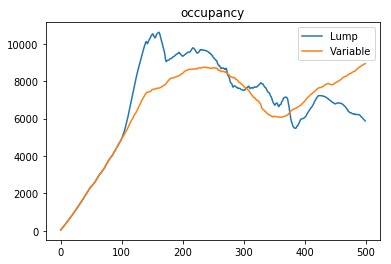

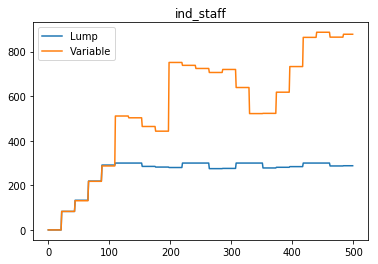

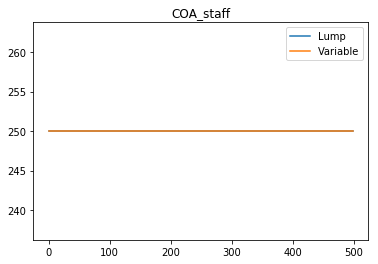

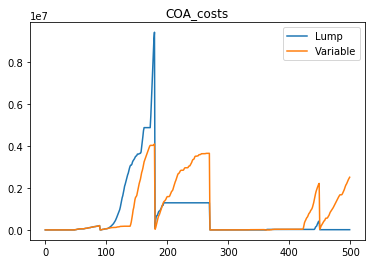

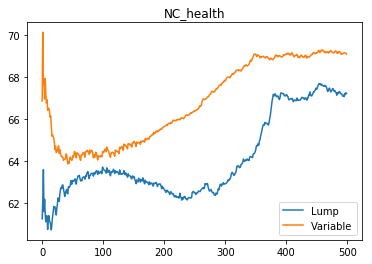

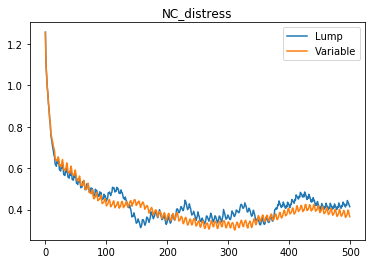

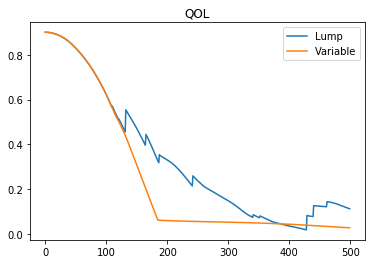

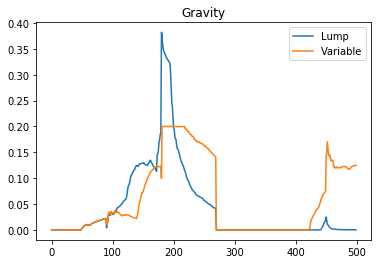

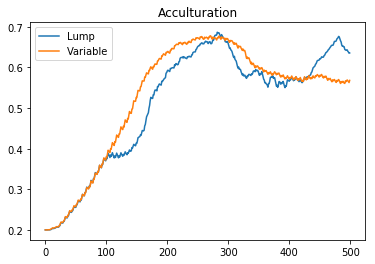

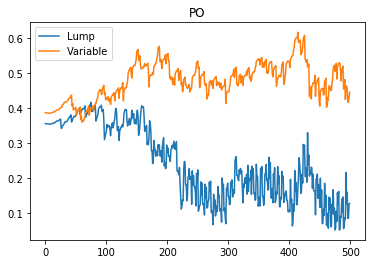

In [7]:
test = HumanitarianLogistics(width, height, num_pols, city_size, 55, 65, 45, 60)
test.include_social_networks = False
test.shock_flag = True
occupancy = []
azcs = [azc for azc in test.schedule.agents if type(azc) is AZC]
hotels = [azc for azc in test.schedule.agents if type(azc) is Hotel]

inds = [ind for ind in test.schedule.agents if type(ind) is IND]
data = {'occupancy' : [],
       'ind_staff' : [],
        'COA_staff':[],
       'COA_costs' : [],
       'NC_health' : [],
       'NC_distress': [],
       'QOL': [],
       'Gravity':[],
       'Acculturation': [],
       'PO': []}

for step in range(number_steps):
    
    test.step()
    ncs = [nc for azc in azcs for nc in azc.occupants] + [nc for ind in inds for nc in ind.city.hotel.occupants]
    data['occupancy'].append(np.sum([azc.occupancy for azc in azcs]) + np.sum([hotel.occupancy for hotel in hotels]))
    data['ind_staff'].append(np.sum([ind.staff for ind in inds]))
    data['COA_staff'].append(np.sum([ind.city.coa.staff for ind in inds]))
    data['COA_costs'].append(np.sum([ind.city.coa.housing_costs + ind.city.coa.hotel_costs for ind in inds]))
    data['NC_health'].append(np.mean([nc.health for nc in ncs]))
    data['NC_distress'].append(np.mean([nc.values.health for nc in ncs]))
    data['QOL'].append(np.mean([ind.city.coa.get_qol() for ind in inds]))
    data['Gravity'].append(np.mean([ind.city.coa.gravity for ind in inds]))
    data['Acculturation'].append(np.mean([nc.acculturation for nc in ncs]))
    data['PO'].append(np.mean([ind.city.public_opinion for ind in inds]))


print(data)
lump_df = pd.DataFrame.from_dict(data)

#### variable funding IND

test = HumanitarianLogistics(width, height, num_pols, city_size, 55, 65, 45, 60)
test.include_social_networks = False
test.shock_flag = False
occupancy = []
azcs = [azc for azc in test.schedule.agents if type(azc) is AZC]
hotels = [azc for azc in test.schedule.agents if type(azc) is Hotel]
inds = [ind for ind in test.schedule.agents if type(ind) is IND]

for ind in inds:
    ind.budget_frequency = 90
    ind.budget = Budget(ind.accounts, ind.budget_frequency)

data = {'occupancy' : [],
       'ind_staff' : [],
        'COA_staff':[],
       'COA_costs' : [],
       'NC_health' : [],
       'NC_distress': [],
       'QOL': [],
       'Gravity':[],
       'Acculturation': [],
       'PO': []}

for step in range(number_steps):
    
    test.step()
    ncs = [nc for azc in azcs for nc in azc.occupants] + [nc for ind in inds for nc in ind.city.hotel.occupants]
    data['occupancy'].append(np.sum([azc.occupancy for azc in azcs]) + np.sum([hotel.occupancy for hotel in hotels]))
    data['ind_staff'].append(np.sum([ind.staff for ind in inds]))
    data['COA_staff'].append(np.sum([ind.city.coa.staff for ind in inds]))
    data['COA_costs'].append(np.sum([ind.city.coa.housing_costs + ind.city.coa.hotel_costs for ind in inds]))
    data['NC_health'].append(np.mean([nc.health for nc in ncs]))
    data['NC_distress'].append(np.mean([nc.values.health for nc in ncs]))
    data['QOL'].append(np.mean([ind.city.coa.get_qol() for ind in inds]))
    data['Gravity'].append(np.mean([ind.city.coa.gravity for ind in inds]))
    data['Acculturation'].append(np.mean([nc.acculturation for nc in ncs]))
    data['PO'].append(np.mean([ind.city.public_opinion for ind in inds]))

var_df = pd.DataFrame.from_dict(data)

for key in data.keys():
    plt.plot(lump_df[key])
    plt.plot(var_df[key])
    plt.legend(['Lump', 'Variable'])
    plt.title(str(key))
    plt.show()


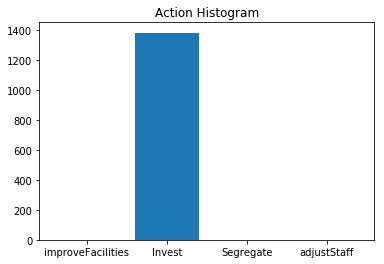

In [11]:
variable = [coa for coa in test.schedule.agents if type(coa) is COA]
gen_hist(variable)

/home/phillip/Documents/Thesis/Code/working_model/activity.py:305: RuntimeWarning: divide by zero encountered in double_scalars
  staff_fitness = self.agent.staff / (total_occ*self.agent.staff_to_resident_ratio)
/home/phillip/anaconda3/envs/port/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/phillip/anaconda3/envs/port/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/phillip/Documents/Thesis/Code/working_model/organizations.py:297: RuntimeWarning: divide by zero encountered in double_scalars
  staff_fitness = self.staff / (total_occ*self.staff_to_resident_ratio)


0
Invest
0
Invest
0
Invest
0
Invest
0
Invest
0
improveFacilities
0
improveFacilities
0
Invest
0
Invest
0
improveFacilities
0
improveFacilities
0
Invest
0
Invest
0
improveFacilities
0
improveFacilities
0
improveFacilities
0
Segregate
0
improveFacilities
0
Invest
0
Segregate
0
improveFacilities
0
improveFacilities
0
Segregate
0
Segregate
0
Segregate
0
Segregate
0
Segregate
0
Segregate
0
Segregate
0
Segregate
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.0
0
0
0
0
0
0
0.0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.0
0
0
0
0
0
0
0
0.0
0
0
0
0
0.0
0
0
0
0.0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.0
0.0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.0
0
0
0
0
0
0
0.0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.0
0
0.0
0
0
0
0
0
0
0
0
0.0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.0
0.0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.0
0.0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.0
0
0
0
0
0.0
0
0
0
0
0
0.0
0
0
0
0
0
0
0
0
0
0
0
0
0.0
0
0
0
0
0
0
0
0
0
0
0
0
0.0
0
0
0
0
0
0
0
0
0
0
0.0
0
0
0
0
0
0
0
0
0
0
0.0
0
0
0
0.

0.0
0
0
0
0
0
0.0
0
0
0
0
0
0
0
0.0
0
0
0
0
0.0
0.0
0
0
0.0
0.0
0
0.0
0.0
0
0
0
0
0
0.0
0.0
0
0
0
0
0
0
0
0.0
0
0.0
0
0
0
0
0
0
0
0.0
0.0
0
0.0
0.0
0.0
Invest
0
Invest
0.0
Invest
0
Invest
0
Invest
0
Invest
0
adjustStaff
0
Invest
0
Invest
0
adjustStaff
0
adjustStaff
0
adjustStaff
0
Invest
0
improveFacilities
0
adjustStaff
0
improveFacilities
0
improveFacilities
0.0
Invest
0
adjustStaff
0.0
adjustStaff
0.0
adjustStaff
0
adjustStaff
0
improveFacilities
0.0
improveFacilities
0.0
improveFacilities
0
improveFacilities
0.0
adjustStaff
0
improveFacilities
0.0
improveFacilities
0
improveFacilities
0.0
0
0
0
0
0
0
0.0
0
0
0
0
0
0
0.0
0
0
0
0
0.0
0
0.0
0
0
0.0
0.0
0.0
0.0
0
0
0
0.0
0.0
0
0
0
0
0
0
0.0
0
0
0
0.0
0
0.0
0
0.0
0
0
0
0
0.0
0
0
0
0.0
0
0
0.0
0.0
0.0
0
0
0.0
0
0.0
0
0
0
0.0
0
0
0
0
0
0
0.0
0
0.0
0
0
0
0
0
0
0
0.0
0
0.0
0
0.0
0
0
0.0
0.0
0
0.0
0
0.0
0
0.0
0.0
0
0
0
0
0
0
0
0.0
0
0
0
0
0
0.0
0
0
0
0.0
0
0
0.0
0
0
0
0
0
0
0.0
0.0
0
0
0.0
0
0
0
0.0
0
0
0
0
0.0
0
0
0.0
0
0
0.0
0.0
0.0
0
0
0.

0
0.17721518987341772
0
0
problematic
problematic
0
0.419063733784546
problematic
0
problematic
0.17543859649122806
0.42202347680268304
0
problematic
0
0
0
0
problematic
0.1745635910224439
0.42660044150110377
0.1745635910224439
0
0
problematic
0
0
problematic
0
problematic
problematic
0.3020304568527919
problematic
problematic
0
problematic
0.3020304568527919
problematic
problematic
0
0.3055555555555556
problematic
0.43729903536977494
0.18673218673218672
problematic
0
0
0
0
problematic
0
problematic
0
problematic
0
0
0.4398950131233596
problematic
problematic
0
0
0
Invest
0
Invest
problematic
shock
0
Invest
0
improveFacilities
0
Invest
0
improveFacilities
problematic
problematic
shock
problematic
0.3341404358353511
Invest
problematic
problematic
0
Invest
problematic
0.44933469805527126
Invest
0
Invest
problematic
0.3341404358353511
improveFacilities
0
improveFacilities
problematic
0
Invest
problematic
0
Invest
0
Invest
problematic
0
Invest
problematic
0
improveFacilities
problematic
0


0
problematic
Crisis
problematic
Crisis
0
0.2918464683170566
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
0.2908366533864542
0
0
0
0
0
0
0
problematic
Crisis
0
0
problematic
Crisis
0
0.28580960854092524
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
0
0.40577507598784196
0
0.40667678300455234
0
0
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
0
problematic
Crisis
0.2831020048468826
0
problematic
Crisis
0
0.31450577663671375
0
0
0
0
0.31626120358514725
0
problematic
Crisis
0
0.41025641025641024
0
problematic
Crisis
0.31887755102040816
problematic
Crisis
problematic
Crisis
0
problematic
Crisis
0
0.28056768558951967
problematic
Crisis
0
problematic
Crisis
0
0
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
0
0
0
0.41467065868263475
0.41467065868263475
problematic
Crisis
0
problematic
Crisis
problematic
Crisis
problema

problematic
0.4157740993184031
problematic
problematic
problematic
problematic
0.5023866348448688
problematic
0
problematic
problematic
problematic
problematic
0.7484662576687117
problematic
0
0
0.41295938104448743
problematic
0
problematic
0
0
0
problematic
0.5011904761904762
0
problematic
problematic
problematic
0.3113176777560339
0
problematic
problematic
0
problematic
0
0.7439024390243902
0
0.31126691668025436
0.41216216216216217
problematic
0.31121617215520053
0
0
0.49763593380614657
0
problematic
0.7218934911242604
0
0
0.4113680154142582
problematic
problematic
problematic
0
problematic
0.4935521688159437
problematic
0
problematic
problematic
0
problematic
0
0
problematic
problematic
0.3094504781974388
0.49067599067599066
problematic
problematic
0.6892655367231638
problematic
0
0.6892655367231638
0
problematic
problematic
0.40861244019138754
problematic
problematic
0
0
0
problematic
0.48953488372093024
0
problematic
0
problematic
0.48783314020857477
problematic
problematic
proble

0.36106346483704976
Invest
0.24985371562317144
Invest
problematic
0.0
Invest
problematic
0.2731435112319359
Invest
0.24956165984804207
improveFacilities
0.3057644110275689
adjustStaff
problematic
0.0
Invest
0.3604452054794521
adjustStaff
problematic
0
improveFacilities
0.30198019801980197
improveFacilities
problematic
problematic
0.27290922087205144
adjustStaff
0.0
adjustStaff
0
Invest
0
improveFacilities
problematic
0
Invest
0
improveFacilities
problematic
problematic
problematic
problematic
0
Invest
0
improveFacilities
0
Invest
0
Invest
problematic
0
Invest
problematic
0.27275325046435206
improveFacilities
0
Invest
0.0
improveFacilities
0.0
improveFacilities
problematic
0.0
Invest
0.2478235635519443
Invest
problematic
0.3595217762596072
improveFacilities
0
0
0
problematic
0.291866028708134
0.24710648148148148
0
problematic
0
0.27232524964336663
0.0
0.358603066439523
0
0.27209236031927025
problematic
problematic
problematic
problematic
problematic
0.24610951008645532
0.356477561388653

problematic
0.0
0.0
problematic
0
0
problematic
0.0
problematic
0.0
problematic
0
0
0.0
0
0.0
0.0
0.0
0
0.0
problematic
problematic
problematic
problematic
problematic
problematic
0
problematic
0
0
0.0
0
0.0
0
problematic
0.0
0
0.0
0
0
0
0.0
0.0
problematic
0
problematic
0
problematic
problematic
problematic
problematic
problematic
0
problematic
0.0
0
0.0
0.0
0
problematic
0
0.0
0.0
problematic
0
0.0
0.0
0.0
problematic
0.0
0
0
0.0
0
0
0
0.0
problematic
problematic
0
0.0
0.0
0.0
problematic
0
0.0
problematic
0
0
0.0
0
0
problematic
0.0
0.0
0
0
problematic
0.0
problematic
problematic
0
problematic
0.0
0
0.0
problematic
0
0
0.0
0.0
0.0
0.0
0
problematic
0
0.0
problematic
0.0
problematic
problematic
0.0
problematic
0
problematic
problematic
0
0
problematic
0
0.0
0.0
problematic
0
0
0
0.0
0
problematic
problematic
problematic
0
problematic
0.0
0.0
0.0
problematic
problematic
0
0.0
0.0
0.0
problematic
0
0.0
0.0
0
problematic
0.0
problematic
0.0
problematic
0
0
problematic
0.0
0
0.0
0
0.0
0


0
0
0
0
0
0
0
0
0.0
0
0
0
0
0
0
0
0.0
0
0.0
0
0
0.0
0.0
0
0
0
0.0
0.0
0
0
0
0
0
0.0
0.0
0
0
0
0
0
0
0
0.0
0.0
0
0
0.0
0
0.0
0.0
0
0
0
0.0
0
0.0
0
0
0
0.0
0
0
0
0.0
0
0
0
0
0.0
0
0
0
0
0.0
0.0
0.0
0.0
0
0
0
0
0.0
0.0
0
0
0
0
0
0
0
0
0
0
0
0.0
0.0
0.0
0
0.0
0
0
0
0
0
0
0
0
0
0
0.0
0
0.0
0.0
0
0
0.0
0.0
0.0
0
0.0
0
0
0
0
0
0
0
Invest
0
Invest
0
Invest
0
Invest
0.0
Invest
0.0
Invest
0
Invest
0
Invest
0.0
improveFacilities
0
Invest
0.0
improveFacilities
0
improveFacilities
0
improveFacilities
0
improveFacilities
0
adjustStaff
0
improveFacilities
0
improveFacilities
0
improveFacilities
0.0
Invest
0
adjustStaff
0.0
improveFacilities
0
improveFacilities
0.0
adjustStaff
0
adjustStaff
0
adjustStaff
0.0
adjustStaff
0
adjustStaff
0
adjustStaff
0
adjustStaff
0.0
adjustStaff
0
0.0
0
0.0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.0
0
0
0.0
0.0
0.0
0.0
0
0
0.0
0
0
0.0
0
0
0
0
0.0
0
0
0
0
0.0
0.0
0.0
0
0.0
0.0
0
0
0
0
0.0
0
0
0
0.0
0.0
0
0
0
0
0
0
0
0
0
0
0.0
0.0
0
0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0
0
0.0
0
0
0.0
0


0
0.0
0
0
0
0.0
0
0
0
0.0
0.0
0
0
0
0.0
0.0
0
0
0
0
0
0
0
0
0
0.0
0.0
0
0.0
0.0
0
0
0
0
0
0
0
0.0
0
0
0.0
0.0
0
0
0
0
0
0
0
0
0.0
0
0
0
0.0
0.0
0
0.0
0.0
0
0
0
0
0
0
0
0.0
0.0
0.0
0
0
0.0
0.0
0
0
0
0
0
0
0
0.0
0.0
0.0
0.0
0
0
0
0
0
0
0
0
0.0
0
0
0.0
0
0
0
0
0
0
0.0
0
0.0
0.0
0.0
0.0
0
0
0
0.0
0
0
0
0
0.0
0
0
0
0
0.0
0.0
0
0
0
0
0
0
0.0
0
0
0
0
0
0.0
0.0
0
0.0
0
0.0
0
0
0
0
0
0.0
0
0
0
0
0
0
0.0
0
0
0.0
0.0
0
0
0
0
0
0
0
0
0.0
0
0.0
0
0
0.0
0
0
0
0
0
0.0
0
0
0.0
0.0
0.0
0.0
0.0
0
0
0
0
0
0.0
0
0
0
0.0
0.0
0
0
0
0
0
0
0
0
0.0
0.0
0
0.0
0.0
0
0
0.0
0
0
0.0
0
0
0
0
0.0
0
0.0
0
0
0
0
0
0
0.0
0.0
0
0.0
0
0.0
0.0
0
0
0
0
0
0
0
0.0
0
0
0
0.0
0
0
0.0
0
0
0
0
0.0
0
0.0
0
0
0
0
0
0
0
0
0.0
0.0
0
0
0.0
0.0
0.0
0
0.0
0
0
0
0
0.0
Invest
0.01653944020356234
Invest
shock
problematic
Crisis
problematic
Crisis
problematic
Crisis
0
Invest
0
Invest
0
Invest
0
Invest
0
Invest
problematic
Crisis
problematic
Crisis
problematic
Crisis
0.0
improveFacilities
problematic
Crisis
problematic
Crisis
problematic
Cri

0.39631336405529954
problematic
0.39770114942528734
problematic
0
problematic
0
problematic
problematic
problematic
problematic
0
0
0.3954022988505747
0
0
0
problematic
0.4723756906077348
0.47286108555657774
0
0
0
problematic
0.4036281179138322
problematic
0
0
0.40632054176072235
0
problematic
problematic
problematic
0.4758281110116383
0.40939597315436244
0.4116331096196868
0
0
0
0.4116331096196868
0.4107142857142857
problematic
0
problematic
0
0
0
0
problematic
0
0
problematic
0
0
problematic
problematic
problematic
problematic
0
0.4799651567944251
problematic
0
0.47956521739130437
problematic
0
problematic
problematic
0.4197802197802198
0
0
problematic
0
problematic
0.48504273504273504
0
0
problematic
problematic
problematic
0
0.48750529436679374
0
problematic
0
0.4229934924078091
problematic
0
problematic
0
0
0
0.42548596112311016
problematic
0
0
0
0.4245689655172414
0
0
0
problematic
0
0
problematic
problematic
0.4313304721030043
0.4896694214876033
problematic
problematic
problemat

problematic
Crisis
0
0.610632183908046
0
problematic
Crisis
0
0.6174785100286533
problematic
Crisis
problematic
Crisis
0.6180257510729614
0
0
0
0
0
0
0.483200621479899
0
0
0
0
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
0.48318515655199074
0.4833976833976834
problematic
Crisis
problematic
Crisis
problematic
Crisis
0.6134094151212554
0
0
problematic
Crisis
problematic
Crisis
0
0.6255259467040674
problematic
Crisis
problematic
Crisis
problematic
Crisis
0
problematic
Crisis
problematic
Crisis
0.6177715091678421
0
0
problematic
Crisis
0
0
0
0
0
0
0.6188466947960619
problematic
Crisis
0
problematic
Crisis
problematic
Crisis
problematic
Crisis
0
0
0.6296809986130375
problematic
Crisis
0
problematic
Crisis
0
0.6301939058171745
0.6312154696132597
0.6199158485273493
0
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
0
problematic
Crisis
0
0.620979020979021
problematic
Crisis
problematic
Crisis
0
0
0
0.49724163295329166
problematic
Crisi

0
0.5509403328372344
0
problematic
Crisis
problematic
Crisis
0
0.7052980132450332
problematic
Crisis
0
0
0
0
problematic
Crisis
problematic
Crisis
0
0
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
0
0
0.5519000939975829
0
0
problematic
Crisis
0.551738021742048
0.7031763417305587
0
0
problematic
Crisis
0
problematic
Crisis
0
problematic
Crisis
0.7038251366120218
0.7091503267973857
0
problematic
Crisis
0
0
0
problematic
Crisis
0
Invest
0.5517700292786798
Invest
0
Invest
problematic
Crisis
problematic
Crisis
0
Invest
0
Invest
problematic
Crisis
problematic
problematic
0
adjustStaff
0
Invest
0
adjustStaff
problematic
problematic
0
improveFacilities
0.7116630669546437
Invest
0.7057546145494028
Invest
problematic
0
adjustStaff
problematic
problematic
problematic
0.5528852502310841
adjustStaff
0.7060737527114967
adjustStaff
problematic
0
adjustStaff
problematic
0.5527426160337553
improveFacilities
0
Invest
0
Invest
0
adjustStaff
0
adjustStaff
0
adjustStaff
0
impr

0
0
0
problematic
0
0
0
0
0
problematic
problematic
0
0.6246786632390745
0.6246786632390745
problematic
problematic
0
problematic
problematic
0
0
0
problematic
problematic
0
0.5279248916706789
0
0
0
0.5606177606177606
problematic
0.6220136518771331
problematic
problematic
0
0.527797833935018
0
0.559322033898305
0
0
0
0.6204255319148936
0
0.6193712829226848
0.5272902139937485
0
0
0.5580322828593389
0
0
0
0
problematic
0
problematic
problematic
problematic
problematic
problematic
problematic
0
0
0.6141533277169334
0
0
problematic
0
0
0.5265306122448979
0.526467410875045
problematic
0
0
problematic
0
0.5262778977681786
0.6126050420168068
0
0
problematic
problematic
problematic
0
0.5554705432287682
0
0
0
problematic
0.5554705432287682
0.6100418410041841
0
0
problematic
0
problematic
problematic
problematic
0.5537757437070938
0
problematic
0
0
0
problematic
0
0
problematic
0
0
0
problematic
0.5247666905958364
problematic
0.5520912547528517
0
0
0
0.6044776119402985
0
problematic
0
0.60447761

problematic
0
0
0.0
0
0
0
problematic
problematic
problematic
0
0
problematic
problematic
0
0
0
0
0.0
problematic
0.0
problematic
problematic
0.0
0.0
0
0.0
problematic
0.0
0
0
problematic
0.0
0
0
0
0.0
0.0
0.0
problematic
problematic
0.0
problematic
0
problematic
0.0
0.0
0
0.0
problematic
0
0
0
problematic
problematic
0
0
0
0.0
0
0
0.0
problematic
problematic
0
problematic
0.0
problematic
0.0
0
0.0
0
0.0
problematic
0.0
problematic
0
0
0.0
0.0
0
problematic
0
0
problematic
problematic
problematic
0
problematic
problematic
0.0
problematic
0
0
0
0
0
problematic
problematic
problematic
problematic
problematic
problematic
0
0
0
0
0.0
problematic
0.0
problematic
problematic
0.0
0
0.0
0
problematic
0
problematic
0.0
0
0
0.0
0.0
problematic
0.0
0.0
0
0.0
0.0
0
0
0
0
0
problematic
problematic
problematic
problematic
0.0
0
0
0.0
0
0.0
problematic
0
0
0.0
0.0
0
problematic
0
0
problematic
0
0.0
0.0
0.0
0.0
0.0
problematic
0.0
problematic
problematic
problematic
0
0.0
0
0.0
0
problematic
problema

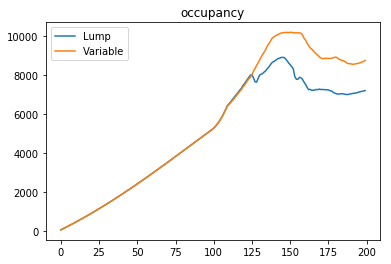

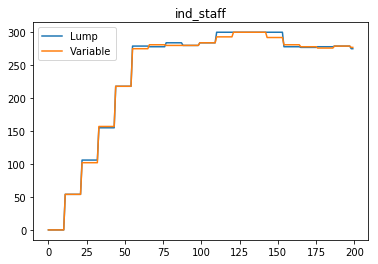

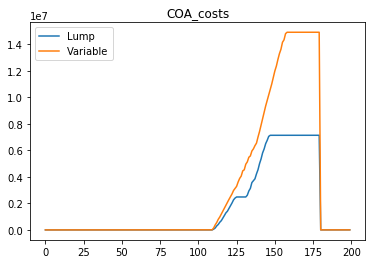

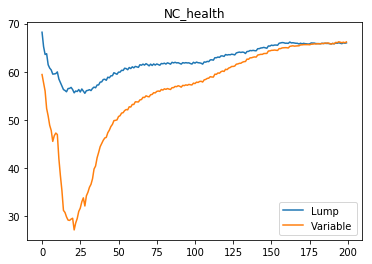

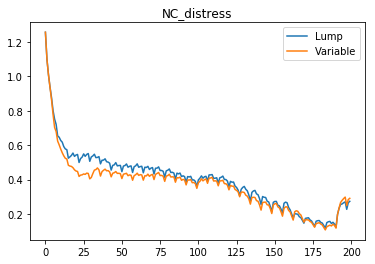

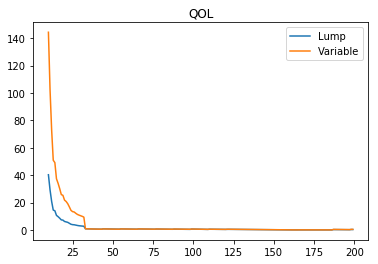

In [5]:
test = HumanitarianLogistics(width, height, num_pols, city_size, 55, 65, 45, 60)
test.include_social_networks = False
occupancy = []
azcs = [azc for azc in test.schedule.agents if type(azc) is AZC]
hotels = [azc for azc in test.schedule.agents if type(azc) is Hotel]

inds = [ind for ind in test.schedule.agents if type(ind) is IND]
data = {'occupancy' : [],
       'ind_staff' : [],
       'COA_costs' : [],
       'NC_health' : [],
       'NC_distress': [],
       'QOL': []}

for step in range(number_steps):
    
    test.step()
    ncs = [nc for azc in azcs for nc in azc.occupants] + [nc for ind in inds for nc in ind.city.hotel.occupants]
    data['occupancy'].append(np.sum([azc.occupancy for azc in azcs]) + np.sum([hotel.occupancy for hotel in hotels]))
    data['ind_staff'].append(np.sum([ind.staff for ind in inds]))
    data['COA_costs'].append(np.sum([ind.city.coa.housing_costs + ind.city.coa.hotel_costs for ind in inds]))
    data['NC_health'].append(np.mean([nc.health for nc in ncs]))
    data['NC_distress'].append(np.mean([nc.values.health for nc in ncs]))
    data['QOL'].append(np.mean([ind.city.coa.get_qol() for ind in inds]))

lump_df = pd.DataFrame.from_dict(data)

#### variable funding IND

test = HumanitarianLogistics(width, height, num_pols, city_size, 55, 65, 45, 60)
test.include_social_networks = False
occupancy = []
azcs = [azc for azc in test.schedule.agents if type(azc) is AZC]
hotels = [azc for azc in test.schedule.agents if type(azc) is Hotel]
inds = [ind for ind in test.schedule.agents if type(ind) is IND]

for azc in azcs:
    azc.health = 100
    azc.city.coa.staff += 30

data = {'occupancy' : [],
       'ind_staff' : [],
       'COA_costs' : [],
       'NC_health' : [],
       'NC_distress': [],
       'QOL': []}

for step in range(number_steps):
    
    test.step()
    ncs = [nc for azc in azcs for nc in azc.occupants] + [nc for ind in inds for nc in ind.city.hotel.occupants]
    data['occupancy'].append(np.sum([azc.occupancy for azc in azcs]) + np.sum([hotel.occupancy for hotel in hotels]))
    data['ind_staff'].append(np.sum([ind.staff for ind in inds]))
    data['COA_costs'].append(np.sum([ind.city.coa.housing_costs + ind.city.coa.hotel_costs for ind in inds]))
    data['NC_health'].append(np.mean([nc.health for nc in ncs]))
    data['NC_distress'].append(np.mean([nc.values.health for nc in ncs]))
    data['QOL'].append(np.mean([ind.city.coa.get_qol() for ind in inds]))

var_df = pd.DataFrame.from_dict(data)

for key in data.keys():
    plt.plot(lump_df[key])
    plt.plot(var_df[key])
    plt.legend(['Lump', 'Variable'])
    plt.title(str(key))
    plt.show()


In [ ]:
test = HumanitarianLogistics(width, height, num_pols, city_size, 55, 65, 45, 60)
test.include_social_networks = False
occupancy = []
azcs = [azc for azc in test.schedule.agents if type(azc) is AZC]
hotels = [azc for azc in test.schedule.agents if type(azc) is Hotel]

inds = [ind for ind in test.schedule.agents if type(ind) is IND]
data = {'occupancy' : [],
       'staff' : [],
       'COA_costs' : [],
       'NC_health' : [],
       'NC_distress': []}

for step in range(number_steps):
    
    test.step()
    ncs = [nc for azc in azcs for nc in azc.occupants] + [nc for ind in inds for nc in ind.city.hotel.occupants]
    data['occupancy'].append(np.sum([azc.occupancy for azc in azcs]) + np.sum([hotel.occupancy for hotel in hotels]))
    data['staff'].append(np.sum([ind.staff for ind in inds]))
    data['COA_costs'].append(np.sum([ind.city.coa.housing_costs + ind.city.coa.hotel_costs for ind in inds]))
    data['NC_health'].append(np.mean([nc.health for nc in ncs]))
    data['NC_distress'].append(np.mean([nc.values.health for nc in ncs]))

lump_df = pd.DataFrame.from_dict(data)

#### variable funding IND

test = HumanitarianLogistics(width, height, num_pols, city_size, 55, 65, 45, 60)
test.include_social_networks = False
test.test = 'B'
occupancy = []
azcs = [azc for azc in test.schedule.agents if type(azc) is AZC]
hotels = [azc for azc in test.schedule.agents if type(azc) is Hotel]
inds = [ind for ind in test.schedule.agents if type(ind) is IND]



data = {'occupancy' : [],
       'staff' : [],
       'COA_costs' : [],
       'NC_health' : [],
       'NC_distress': []}

for step in range(number_steps):
    
    test.step()
    ncs = [nc for azc in azcs for nc in azc.occupants] + [nc for ind in inds for nc in ind.city.hotel.occupants]
    data['occupancy'].append(np.sum([azc.occupancy for azc in azcs]) + np.sum([hotel.occupancy for hotel in hotels]))
    data['staff'].append(np.sum([ind.staff for ind in inds]))
    data['COA_costs'].append(np.sum([ind.city.coa.housing_costs + ind.city.coa.hotel_costs for ind in inds]))
    data['NC_health'].append(np.mean([nc.health for nc in ncs]))
    data['NC_distress'].append(np.mean([nc.values.health for nc in ncs]))

var_df = pd.DataFrame.from_dict(data)

for key in data.keys():
    plt.plot(lump_df[key])
    plt.plot(var_df[key])
    plt.legend(['Lump', 'Variable'])
    plt.title(str(key))
    plt.show()


/home/phillip/Documents/Thesis/Code/working_model/activity.py:307: RuntimeWarning: divide by zero encountered in double_scalars
  staff_fitness = self.agent.staff / (total_occ*self.agent.staff_to_resident_ratio)
/home/phillip/anaconda3/envs/port/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/phillip/anaconda3/envs/port/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/phillip/Documents/Thesis/Code/working_model/organizations.py:301: RuntimeWarning: divide by zero encountered in double_scalars
  staff_fitness = self.staff / (total_occ*self.staff_to_resident_ratio)


Fundraise
Fundraise
Fundraise
Fundraise
Fundraise
Fundraise
Fundraise
Fundraise
Fundraise
Fundraise
marketingCampaign
marketingCampaign
marketingCampaign
marketingCampaign
marketingCampaign
marketingCampaign
marketingCampaign
marketingCampaign
marketingCampaign
marketingCampaign
marketingCampaign
marketingCampaign
marketingCampaign
marketingCampaign
marketingCampaign
marketingCampaign
marketingCampaign
marketingCampaign
marketingCampaign
marketingCampaign
marketingCampaign
marketingCampaign
marketingCampaign
marketingCampaign
marketingCampaign
marketingCampaign
marketingCampaign
marketingCampaign
marketingCampaign
marketingCampaign
marketingCampaign
marketingCampaign
marketingCampaign
marketingCampaign
marketingCampaign
marketingCampaign
marketingCampaign
marketingCampaign
marketingCampaign
marketingCampaign
marketingCampaign
marketingCampaign
marketingCampaign
marketingCampaign
marketingCampaign
marketingCampaign
marketingCampaign
marketingCampaign
marketingCampaign
marketingCampaign


problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic


problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
marketingCampaign
marketingCampaign
marketingCampaign
marketingCampaign
marketingCampaign
marketingCampaign
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
marketingCampaign
problematic
Crisis
marketingCampaign
p

problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic


problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis


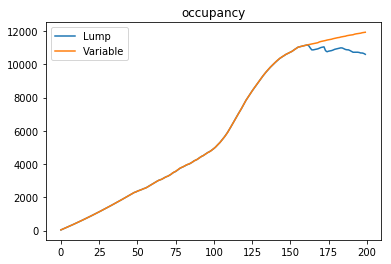

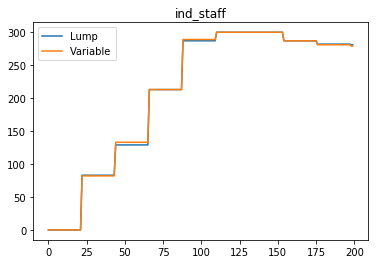

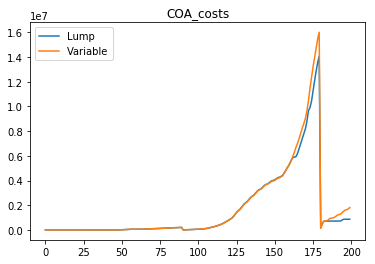

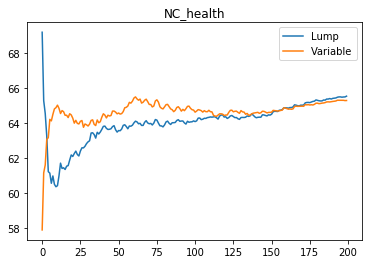

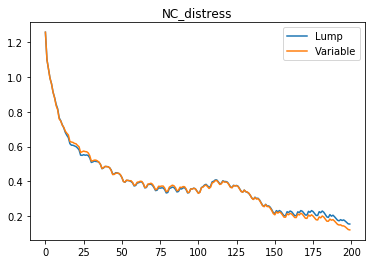

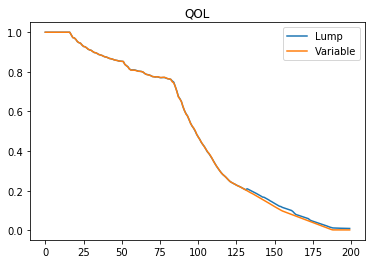

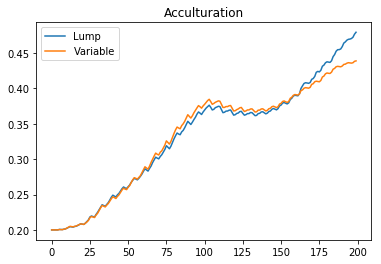

In [4]:
test = HumanitarianLogistics(width, height, num_pols, city_size, 55, 65, 45, 60)
test.include_social_networks = False
occupancy = []
azcs = [azc for azc in test.schedule.agents if type(azc) is AZC]
hotels = [azc for azc in test.schedule.agents if type(azc) is Hotel]

inds = [ind for ind in test.schedule.agents if type(ind) is IND]
data = {'occupancy' : [],
       'ind_staff' : [],
       'COA_costs' : [],
       'NC_health' : [],
       'NC_distress': [],
       'QOL': [],
       'Acculturation': []}

for step in range(number_steps):
    
    test.step()
    ncs = [nc for azc in azcs for nc in azc.occupants] + [nc for ind in inds for nc in ind.city.hotel.occupants]
    data['occupancy'].append(np.sum([azc.occupancy for azc in azcs]) + np.sum([hotel.occupancy for hotel in hotels]))
    data['ind_staff'].append(np.sum([ind.staff for ind in inds]))
    data['COA_costs'].append(np.sum([ind.city.coa.housing_costs + ind.city.coa.hotel_costs for ind in inds]))
    data['NC_health'].append(np.mean([nc.health for nc in ncs]))
    data['NC_distress'].append(np.mean([nc.values.health for nc in ncs]))
    data['QOL'].append(np.mean([ind.city.coa.get_qol() for ind in inds]))
    data['Acculturation'].append(np.mean([nc.acculturation for nc in ncs]))

lump_df = pd.DataFrame.from_dict(data)

#### variable funding IND

test = HumanitarianLogistics(width, height, num_pols, city_size, 55, 65, 45, 60)
test.include_social_networks = False
occupancy = []
azcs = [azc for azc in test.schedule.agents if type(azc) is AZC]
hotels = [azc for azc in test.schedule.agents if type(azc) is Hotel]
inds = [ind for ind in test.schedule.agents if type(ind) is IND]

for ind in inds:
    ind.city.ngo.testing = False

data = {'occupancy' : [],
       'ind_staff' : [],
       'COA_costs' : [],
       'NC_health' : [],
       'NC_distress': [],
       'QOL': [],
       'Acculturation': []}

for step in range(number_steps):
    
    test.step()
    ncs = [nc for azc in azcs for nc in azc.occupants] + [nc for ind in inds for nc in ind.city.hotel.occupants]
    data['occupancy'].append(np.sum([azc.occupancy for azc in azcs]) + np.sum([hotel.occupancy for hotel in hotels]))
    data['ind_staff'].append(np.sum([ind.staff for ind in inds]))
    data['COA_costs'].append(np.sum([ind.city.coa.housing_costs + ind.city.coa.hotel_costs for ind in inds]))
    data['NC_health'].append(np.mean([nc.health for nc in ncs]))
    data['NC_distress'].append(np.mean([nc.values.health for nc in ncs]))
    data['QOL'].append(np.mean([ind.city.coa.get_qol() for ind in inds]))
    data['Acculturation'].append(np.mean([nc.acculturation for nc in ncs]))

var_df = pd.DataFrame.from_dict(data)

for key in data.keys():
    plt.plot(lump_df[key])
    plt.plot(var_df[key])
    plt.legend(['Lump', 'Variable'])
    plt.title(str(key))
    plt.show()


problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic


problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis
problematic
Crisis


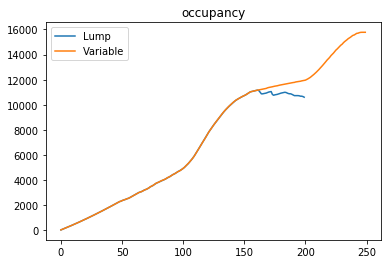

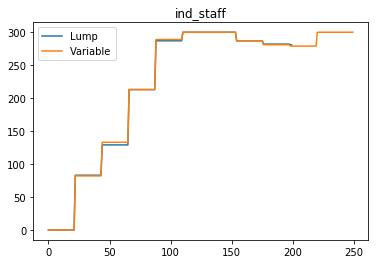

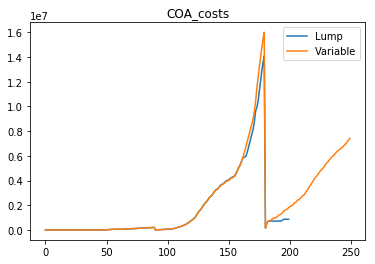

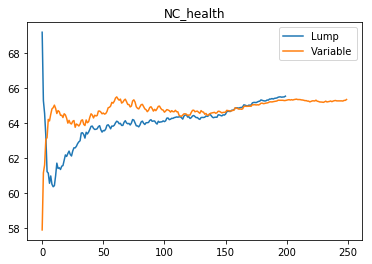

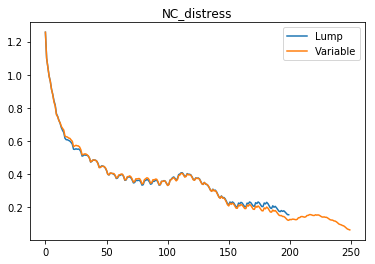

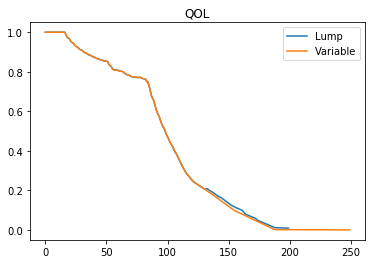

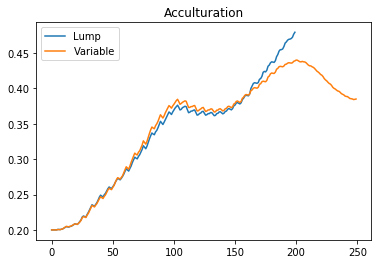

In [5]:
for step in range(50):
    
    test.step()
    ncs = [nc for azc in azcs for nc in azc.occupants] + [nc for ind in inds for nc in ind.city.hotel.occupants]
    data['occupancy'].append(np.sum([azc.occupancy for azc in azcs]) + np.sum([hotel.occupancy for hotel in hotels]))
    data['ind_staff'].append(np.sum([ind.staff for ind in inds]))
    data['COA_costs'].append(np.sum([ind.city.coa.housing_costs + ind.city.coa.hotel_costs for ind in inds]))
    data['NC_health'].append(np.mean([nc.health for nc in ncs]))
    data['NC_distress'].append(np.mean([nc.values.health for nc in ncs]))
    data['QOL'].append(np.mean([ind.city.coa.get_qol() for ind in inds]))
    data['Acculturation'].append(np.mean([nc.acculturation for nc in ncs]))

var_df = pd.DataFrame.from_dict(data)

for key in data.keys():
    plt.plot(lump_df[key])
    plt.plot(var_df[key])
    plt.legend(['Lump', 'Variable'])
    plt.title(str(key))
    plt.show()
